**Task-3** : Iris Flower Classification

**Author** : Pranav Rajyaguru

**Batch** : June 2024

**Domain** : Data Science

**Goal** : To develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements.

In [ ]:
#import all necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import the dataset
iris = pd.read_csv('/content/IRIS.csv')

In [ ]:
#show the data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Preprocessing**

In [ ]:
#checking is there any null value there or not
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
#encoding
le = LabelEncoder()

In [ ]:
for i in iris.columns:
    if is_numeric_dtype(iris[i]):
        continue
    else:
        iris[i] = le.fit_transform(iris[i])

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **Visualisation**

In [ ]:
sns.set()

<Axes: xlabel='species', ylabel='count'>

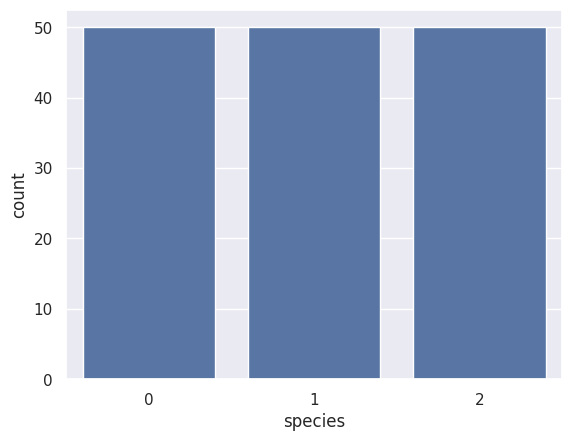

In [ ]:
sns.countplot(x = iris.species)

In [ ]:
df0 = iris[iris.species == 0]
df1 = iris[iris.species == 1]
df2 = iris[iris.species == 2]

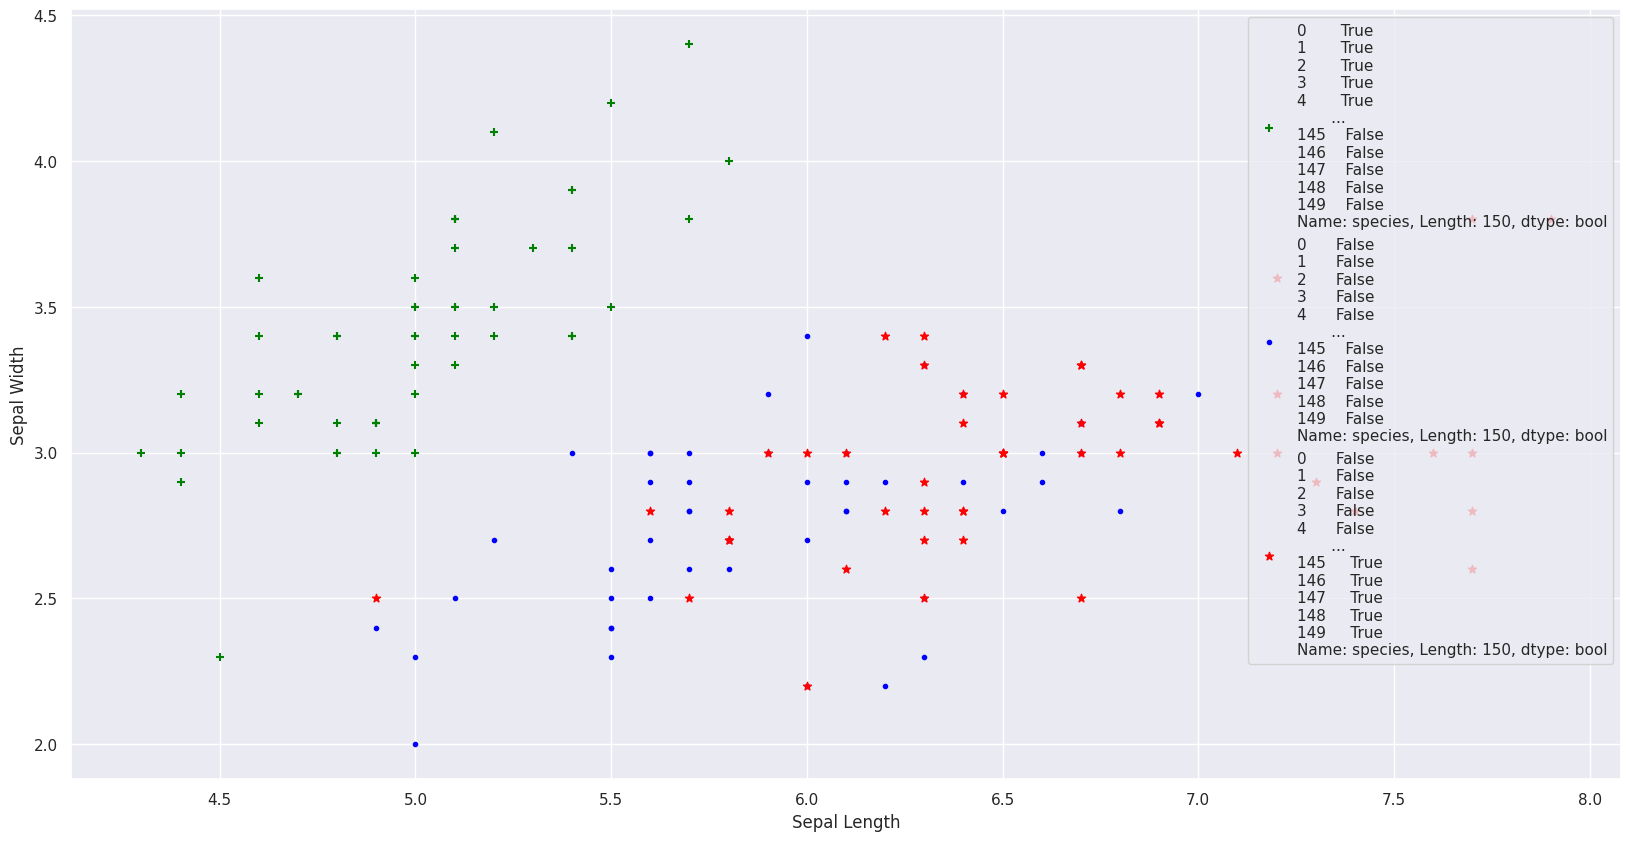

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal_length'], df0['sepal_width'],color="green",marker='+' , label = iris.species == 0)
plt.scatter(df1['sepal_length'], df1['sepal_width'],color="blue",marker='.',  label = iris.species == 1)
plt.scatter(df2['sepal_length'], df2['sepal_width'],color="red",marker='*',  label = iris.species == 2)
plt.legend()
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

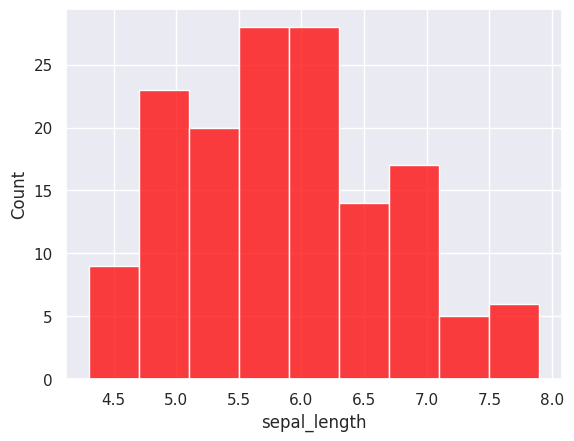

In [ ]:
sns.histplot(data = iris , x = iris.sepal_length ,color = 'red')

<Axes: xlabel='sepal_width', ylabel='Count'>

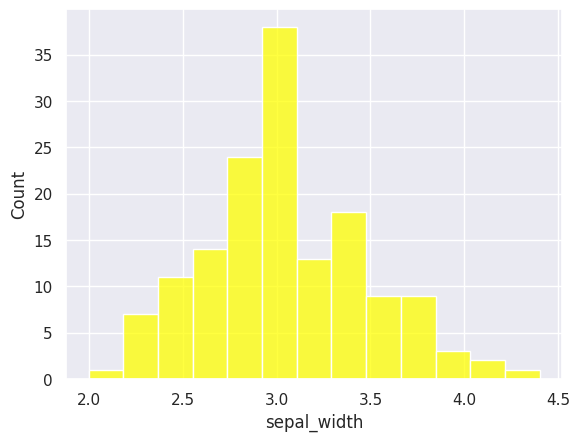

In [ ]:
sns.histplot(data = iris , x = iris.sepal_width ,color = 'yellow')

<Axes: xlabel='petal_length', ylabel='Count'>

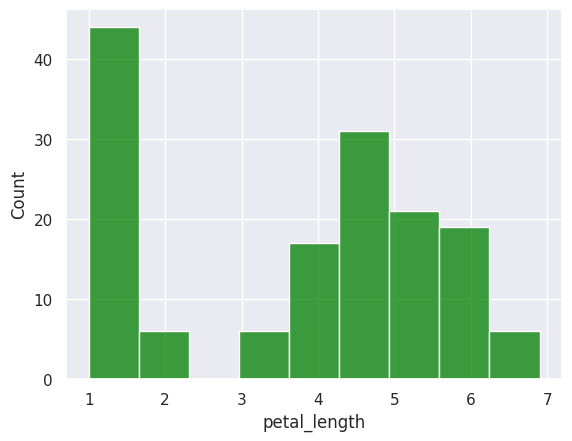

In [ ]:
sns.histplot(data = iris , x = iris.petal_length ,color = 'green')

<Axes: xlabel='petal_width', ylabel='Count'>

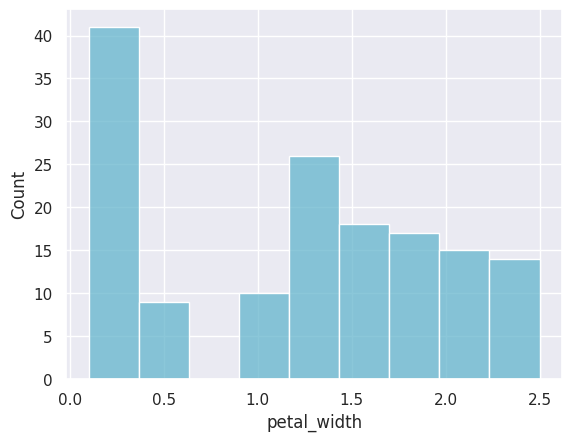

In [ ]:
sns.histplot(data = iris , x = iris.petal_width ,color = 'c')

# **Split** Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
X = iris.drop(['species'], axis='columns')
y = iris.species

In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split(X , y , test_size = .2)

# **Model Selection**

In [ ]:
#ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators = 200 , random_state=100)
etc.fit(xtrain , ytrain)
print(f'train score:{etc.score(xtrain , ytrain)}')
print(f'test score:{etc.score(xtest , ytest)}')

train score:1.0
test score:1.0


In [ ]:
#RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 300 , random_state=100)
ran.fit(xtrain , ytrain)
print(f'train score of RandomForestClassifier : {ran.score(xtrain , ytrain)}')
print(f'test score of RandomForestClassifier : {ran.score(xtest , ytest)}')

train score of RandomForestClassifier : 1.0
test score of RandomForestClassifier : 1.0


In [ ]:
#SVM
sv = SVC()
sv.fit(xtrain , ytrain)
print(f'train score SVM:{sv.score(xtrain , ytrain)}')
print(f'test score SVM:{sv.score(xtest , ytest)}')

train score SVM:0.9666666666666667
test score SVM:1.0


<Axes: >

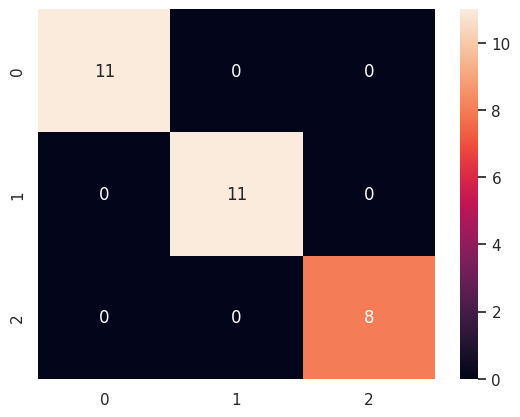

In [ ]:
#for etc
etc_con = confusion_matrix(ytest , etc.predict(xtest))
sns.heatmap(etc_con , annot = True )

<Axes: >

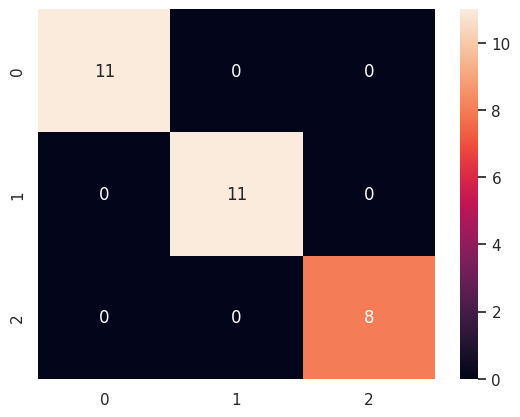

In [ ]:
ran_con = confusion_matrix(ytest , ran.predict(xtest))
sns.heatmap(ran_con , annot = True )